### Luis Eduardo Jiménez del Muro - 30/09/2023

# Tarea - Caminata aleatoria y simulación montecarlo

#### 1. Simulación del movimiento browniano

El movimiento browniano es el movimiento aleatorio que se observa en las partículas que se hallan en un medio fluido, como resultado de choques contra las moléculas de dicho fluido [(referencia)].

[(referencia)]: https://es.wikipedia.org/wiki/Movimiento_browniano

Para simular el movimiento, en lugar de usar las ecuaciones integro-diferenciales que describe Einstein, use una caminta aleatoria para los tres ejes $x$, $y$, $z$ de la siguiente forma
$$
W_i=W_{i-1}+X_i\sqrt{\Delta t}
$$
donde, $\Delta t$ es un intervalo de tiempo y 
$$
X_i=\left\{\begin{array}{l}
1\\
-1
\end{array}\right.,
$$
se escoge de forma aleatoria con la misma probabilidad.

Simule $10$ segundos con un $\Delta t=0.001$ y represéntelo en un gráfico 3D (Puede ver el archivo de Ejemplo 3D).

In [364]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

x = [0]
y = [0]
z = [0]

direccion = [x, y, z]
ad_at = [1, -1]

resultados = []

for i in range(10):
    posicion_ad_at = [0]
    
    for j in range(1000):
        resultado_direccion = random.choice(direccion)
        resultado_ad_at = random.choice(ad_at)
        
        if resultado_direccion == x:
            x.append( x[-1] + resultado_ad_at )
            y.append( y[-1] )
            z.append( z[-1] )
            
        elif resultado_direccion == y:
            x.append( x[-1] )
            y.append( y[-1] + resultado_ad_at )
            z.append( z[-1] )
            
        elif resultado_direccion == z:
            x.append( x[-1] )
            y.append( y[-1] )
            z.append( z[-1] + resultado_ad_at )           
    



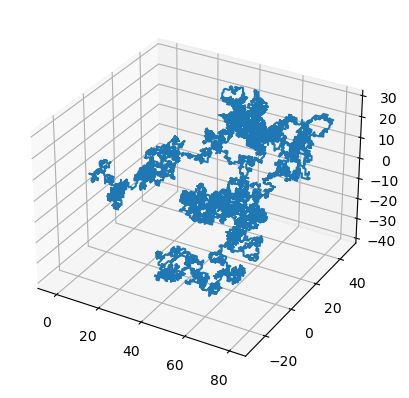

In [365]:
# Modulos con los que trabajaremos
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
xv = np.array([x])
yv = np.array([y])
zv = np.array([z])

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(xv, yv, zv)

# Mostramos el gráfico
plt.show()

In [366]:
len(x)

10001

In [367]:
len(y)

10001

In [368]:
len(z)

10001

#### 2. Apuesta arriesgada

Un jugador, con 20 pesos de capital inicial, decide apostar a un volado (con una moneda perfectamente nivelada) la mitad de su capital si éste es mayor o igual a 6 pesos, de lo contrario, solo 2. Esto es, el capital $C_i$ en cada volado $V_i$ se describe como
$$
C_{i+1}=C_i+V_iA_i
$$
donde la apuesta es 
$$
A_i=\left\{\begin{array}{l}
C_i/2,\quad \mbox{si }C_i\geq 6\\
2,\quad \mbox{de lo contrario.}
\end{array}\right.
$$

1. Grafique la evolución del capital hasta quedar en cero.
2. Determine el número de volados promedio para quedar en quiebra usando la simulación montecarlo para 10,000 apostadores.
3. Muestre un histograma del número de volados.

### 1. Gráfica de la evolución del capital hasta quedar en cero

In [369]:
import numpy as np

moneda = ["águila", "sello"]

def volado():
    resultado = np.random.choice(moneda)
    if resultado == "águila":
        return True
    else:
        return False
volado()

False

In [376]:
evolucion_cap = []

def juego(C0):
    
    evolucion_cap.append(C0)
    
    while evolucion_cap[-1] > 0:
        
        if evolucion_cap[-1] >= 6:
            apuesta = evolucion_cap[-1] / 2
        else:
            apuesta = 2
    
        resultado = volado()
        
        if resultado == True:
            evolucion_cap.append(evolucion_cap[-1] + apuesta)
        else:
            evolucion_cap.append(evolucion_cap[-1] - apuesta)
        
juego(20)
evolucion_cap

[20,
 10.0,
 15.0,
 7.5,
 3.75,
 1.75,
 3.75,
 5.75,
 3.75,
 1.75,
 3.75,
 1.75,
 3.75,
 1.75,
 3.75,
 1.75,
 3.75,
 5.75,
 7.75,
 3.875,
 5.875,
 3.875,
 1.875,
 -0.125]

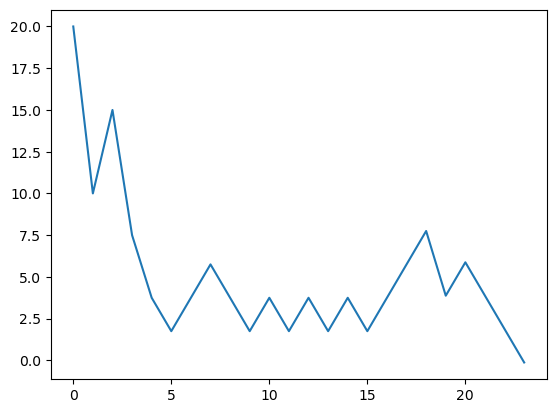

In [377]:
m = len(evolucion_cap)
x = np.linspace(0, m-1, m)
def grafica():
    plt.figure()
    plt.plot(x, evolucion_cap)
    
grafica()

### 2. Promedio para quedar en quiebra con de 10,000 apostadores

In [372]:
N = 10000
n_veces = []

for i in range(N):
    evolucion_cap = []
    
    def juego(C0):

        evolucion_cap.append(C0)

        while evolucion_cap[-1] > 0:

            if evolucion_cap[-1] >= 6:
                apuesta = evolucion_cap[-1] / 2
            else:
                apuesta = 2

            resultado = volado()

            if resultado == True:
                evolucion_cap.append(evolucion_cap[-1] + apuesta)
            else:
                evolucion_cap.append(evolucion_cap[-1] - apuesta)

    juego(20)
    veces = n_veces.append(len(evolucion_cap))
    
promedio = np.mean(n_veces)
promedio

27.5568

### 3. Histograma del número de volados

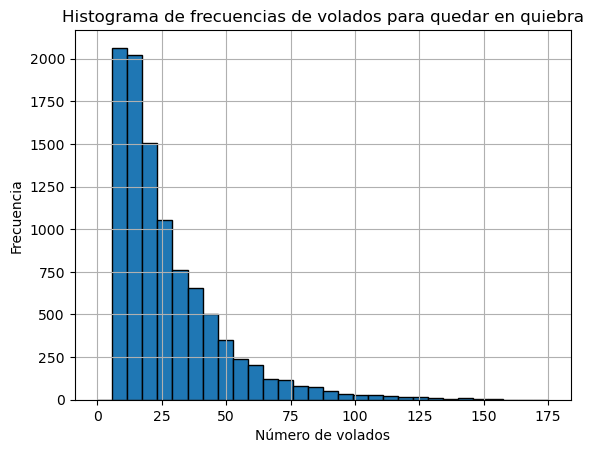

In [373]:
plt.hist(n_veces, bins=30, range=(0, 175), edgecolor="k")
plt.title("Histograma de frecuencias de volados para quedar en quiebra")
plt.xlabel("Número de volados")
plt.ylabel("Frecuencia")
plt.grid()